<a href="https://colab.research.google.com/github/broharigunda/Learnings/blob/master/Cibi_P_QL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [2]:
df['AHD'] = df.AHD.replace({"No":0, "Yes":1})

In [3]:
model = sm.GLM.from_formula("AHD ~ Age", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -201.27
Date:                Sun, 25 Jun 2023   Deviance:                       402.54
Time:                        11:50:02   Pearson chi2:                     303.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04970
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0059      0.759     -3.960      0.000      -4.494      -1.518
Age            0.0520      0.014      3.803      0.000       0.025       0.079
==============================================================================
"""

In [4]:
df["sex1"]=df.Sex.replace({1:"Male",0:"Female"})

In [16]:
c=pd.crosstab(df.sex1,df.AHD)

In [17]:
c=c.apply(lambda x:x/x.sum(), axis=1)

In [18]:
c

AHD,0,1
sex1,,
Female,0.742268,0.257732
Male,0.446602,0.553398


In [19]:
c["odds"]=c.loc[:, 1] / c.loc[:, 0]

In [20]:
c

AHD,0,1,odds
sex1,,,
Female,0.742268,0.257732,0.347222
Male,0.446602,0.553398,1.239130


In [21]:
c.odds.Male/c.odds.Female

3.5686956521739135

In [22]:
c['logodds'] = np.log(c.odds)

In [23]:
c

AHD,0,1,odds,logodds
sex1,,,,
Female,0.742268,0.257732,0.347222,-1.05779
Male,0.446602,0.553398,1.239130,0.21441


In [25]:
model = sm.GLM.from_formula("AHD ~ sex1", family=sm.families.Binomial(), data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -196.97
Date:                Sun, 25 Jun 2023   Deviance:                       393.93
Time:                        12:09:11   Pearson chi2:                     303.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07630
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0578      0.232     -4.557      0.000      -1.513      -0.603
sex1[T.Male]     1.2722      0.271      4.692      0.000       0.741       1.804
================================================================================
"""

In [27]:
c.logodds.Male - c.logodds.Female

1.27220016549331

In [28]:
df["Sex1"] = df.Sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)

In [29]:
c

AHD,0,1
Sex1,,
Female,0.742268,0.257732
Male,0.446602,0.553398


In [30]:
model = sm.GLM.from_formula("AHD ~ Age + sex1", family = sm.families.Binomial(), data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      300
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -186.15
Date:                Sun, 25 Jun 2023   Deviance:                       372.31
Time:                        12:14:29   Pearson chi2:                     298.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1399
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.8077      0.898     -5.353      0.000      -6.568      -3.047
sex1[T.Male]     1.4989      0.289      5.179      0.000       0.932       2.066
Age              0.0657      0.015      4.427      0.000       0.037       0.095
================================================================================
"""

In [31]:
# fitting model with three variable
model = sm.GLM.from_formula("AHD ~ Age + sex1 + Chol", family = sm.families.Binomial(), data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      299
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -184.30
Date:                Sun, 25 Jun 2023   Deviance:                       368.59
Time:                        12:17:30   Pearson chi2:                     295.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1504
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.9094      1.095     -5.395      0.000      -8.056      -3.762
sex1[T.Male]     1.6318      0.303      5.382      0.000       1.038       2.226
Age              0.0622      0.015      4.117      0.000       0.033       0.092
Chol             0.0048      0.003      1.902      0.057      -0.000       0.010
================================================================================
"""

In [35]:
df[['Age', 'Sex', 'Chol']].corr()

,Age,Sex,Chol
Age,1.000000,-0.097542,0.208950
Sex,-0.097542,1.000000,-0.199915
Chol,0.208950,-0.199915,1.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/sandbox/predict_functional.py:169: ValueWarning: 'Sex1', 'Slope', 'ChestPain', 'ExAng', 'RestECG', 'Oldpeak', 'Thal', 'Ca', 'Fbs', 'MaxHR', 'Unnamed: 0', 'RestBP' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


Text(0, 0.5, 'Heart Disease')

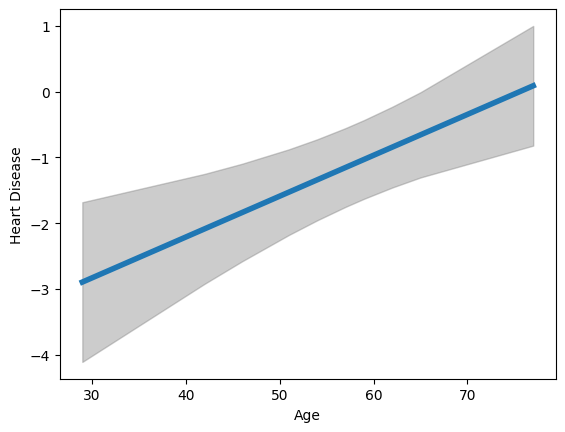

In [42]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"sex1":"Female","Sex":0,"AHD":1,"Chol":250}

pr,cb,fv=predict_functional(result,"Age",values=values,ci_method="simultaneous")

ax=sns.lineplot(x=fv,y=pr,lw=4)
ax.fill_between(fv,cb[:,0],cb[:,1],color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("Heart Disease")

In [38]:
print(pr,cb,fv)

0   -2.896885
1   -2.087688
2   -1.838704
3   -1.527475
4   -1.340737
5   -1.153999
6   -1.029508
7   -0.842770
8   -0.656032
9    0.090919
dtype: float64 [[-4.11186567 -1.68190445]
 [-2.92442605 -1.25095024]
 [-2.58109323 -1.09631573]
 [-2.17887905 -0.87607074]
 [-1.95712288 -0.72435141]
 [-1.75341956 -0.55457923]
 [-1.628472   -0.43054312]
 [-1.45738093 -0.2281587 ]
 [-1.30449518 -0.00756895]
 [-0.81969973  1.0015376 ]] [29. 42. 46. 51. 54. 57. 59. 62. 65. 77.]


Text(0, 0.5, 'Heart Disease')

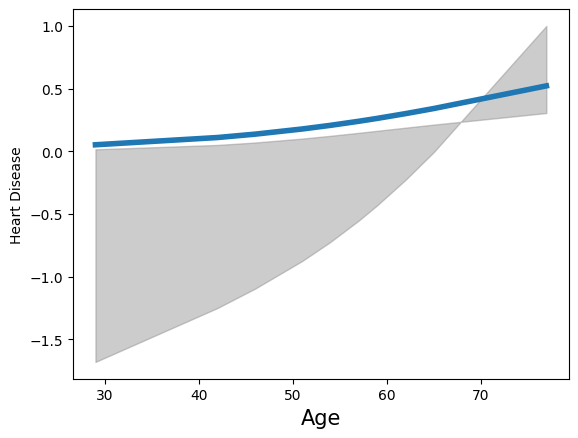

In [43]:
pr1=1/(1+np.exp(-pr))
cb1=1/(1+np.exp(-cb))
ax=sns.lineplot(x=fv,y=pr1,lw=4)
ax.fill_between(fv,cb1[:,0],cb[:,1],color='grey',alpha=0.4)
ax.set_xlabel("Age",size=15)
ax.set_ylabel("Heart Disease")

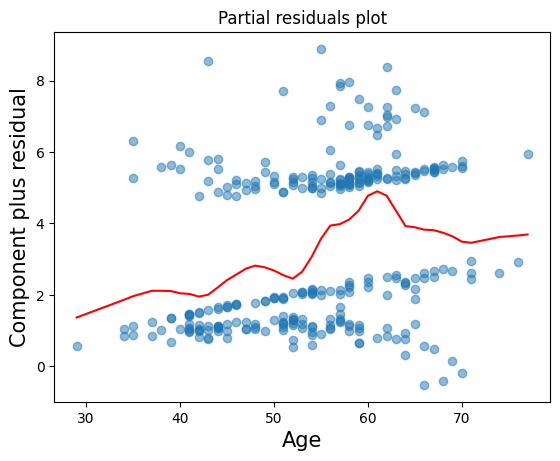

In [44]:
from statsmodels.graphics.regressionplots import add_lowess
fig = result.plot_partial_residuals("Age")
ax=fig.get_axes()[0]
ax.lines[0].set_alpha(0.5)
_=add_lowess(ax)

In [46]:
df['ChestPain'] = df.ChestPain.replace({"typical":1, "asymptomatic": 2, 'nonanginal': 3, 'nontypical':4})
df['Thal'] = df.Thal.replace({'fixed': 1, 'normal': 2, 'reversable': 3})
df[['Age', 'Sex1', 'Chol','RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']].corr()

<ipython-input-46-7e0818774741>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Age', 'Sex1', 'Chol','RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']].corr()


,Age,Chol,RestBP,Fbs,RestECG,Slope,Oldpeak,Ca,ExAng,ChestPain,Thal
Age,1.000000,0.208950,0.284946,0.118530,0.148868,0.161770,0.203805,0.362605,0.091661,-0.173124,0.061823
Chol,0.208950,1.000000,0.130120,0.009841,0.171043,-0.004062,0.046564,0.119000,0.061310,-0.015387,0.080874
RestBP,0.284946,0.130120,1.000000,0.175340,0.146560,0.117382,0.189171,0.098773,0.064762,-0.145149,0.057602
Fbs,0.118530,0.009841,0.175340,1.000000,0.069564,0.059894,0.005747,0.145478,0.025665,-0.023976,-0.007605
RestECG,0.148868,0.171043,0.146560,0.069564,1.000000,0.133946,0.114133,0.128343,0.084867,-0.157005,-0.011543
Slope,0.161770,-0.004062,0.117382,0.059894,0.133946,1.000000,0.577537,0.110119,0.257748,-0.250500,0.106051
Oldpeak,0.203805,0.046564,0.189171,0.005747,0.114133,0.577537,1.000000,0.295832,0.288223,-0.334661,0.208998
Ca,0.362605,0.119000,0.098773,0.145478,0.128343,0.110119,0.295832,1.000000,0.145570,-0.187667,0.149768
ExAng,0.091661,0.061310,0.064762,0.025665,0.084867,0.257748,0.288223,0.145570,1.000000,-0.314993,0.228084
ChestPain,-0.173124,-0.015387,-0.145149,-0.023976,-0.157005,-0.250500,-0.334661,-0.187667,-0.314993,1.000000,-0.168103


In [47]:
model = sm.GLM.from_formula("AHD ~ Age + sex1 + Chol + RestBP + Fbs + RestECG + Slope + Oldpeak + Ca + ExAng + ChestPain + Thal", family=sm.families.Binomial(), data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  297
Model:                            GLM   Df Residuals:                      284
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -113.49
Date:                Sun, 25 Jun 2023   Deviance:                       226.99
Time:                        12:49:39   Pearson chi2:                     287.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4599
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.0184      2.167     -4.162      0.000     -13.266      -4.771
sex1[T.Male]     1.3765      0.426      3.230      0.001       0.541       2.212
Age              0.0052      0.021      0.245      0.807      -0.037       0.047
Chol             0.0041      0.004      1.160      0.246      -0.003       0.011
RestBP           0.0165      0.010      1.621      0.105      -0.003       0.036
Fbs             -1.0297      0.507     -2.031      0.042      -2.024      -0.036
RestECG          0.2011      0.173      1.164      0.244      -0.138       0.540
Slope            0.7875      0.336      2.343      0.019       0.129       1.446
Oldpeak          0.2789      0.205      1.361      0.174      -0.123       0.681
Ca               1.3120      0.247      5.301      0.000       0.827       1.797
ExAng            1.4776      0.372      3.976      0.000       0.749       2.206
ChestPain       -0.2524      0.205     -1.234      0.217      -0.653       0.149
Thal             0.9276      0.282      3.285      0.001       0.374       1.481
================================================================================
"""

In [57]:
X = df[['Age', 'sex1', 'Chol','RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']]
predicted_output = result.predict(X)

In [58]:
predicted_output

0      0.285203
1      0.996575
2      0.991014
3      0.537940
4      0.032250
         ...   
298    0.480957
299    0.906514
300    0.909929
301    0.185609
302         NaN
Length: 303, dtype: float64

In [59]:
for i in range(0,len(predicted_output)):
  predicted_output = predicted_output.replace()
  if predicted_output[i]>=0.5:
    predicted_output = predicted_output.replace(predicted_output[i],1)
  else:
    predicted_output = predicted_output.replace(predicted_output[i],0)

In [60]:
predicted_output

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
298    0.0
299    1.0
300    1.0
301    0.0
302    0.0
Length: 303, dtype: float64

In [62]:
accuracy = 0
for i in range(0,len(predicted_output)):
  if df['AHD'][i] == predicted_output[i]:
    accuracy+=1
accuracy/len(df)

0.8118811881188119